In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gseapy
from gseapy.plot import gseaplot
import gunzip

In [2]:
diff_seaad_mtg_astro = pd.read_csv('../results/SEA_AD/MTG/de_genes_ref_br6_astrocytes.tsv',sep='\t',index_col=0)
diff_seaad_mtg_micro = pd.read_csv('../results/SEA_AD/MTG/de_genes_ref_br6_microglia.tsv',sep='\t',index_col=0)
diff_brenner_astro = pd.read_csv('../results/human_alcohol_brenner_et_al/de_astrocytes.tsv',sep='\t',index_col=0)
diff_brenner_micro = pd.read_csv('../results/human_alcohol_brenner_et_al/de_microglia.tsv',sep='\t',index_col=0)
intersecting_astro = pd.read_csv('../results/intersecting_de_genes_astrocytes_seaad_mtg_brenner',sep='\t')
intersecting_micro = pd.read_csv('../results/intersecting_de_genes_microglia_seaad_mtg_brenner',sep='\t')

In [3]:
diff_seaad_mtg_astro

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
ISG15,0.000000e+00,-1.049978,0.054,0.369,0.000000
AL139246.5,0.000000e+00,-0.923788,0.043,0.275,0.000000
MEF2D,0.000000e+00,-0.626327,0.825,0.961,0.000000
ITPKB-IT1,0.000000e+00,0.790184,0.976,0.704,0.000000
AC068725.1,0.000000e+00,-0.343323,0.991,1.000,0.000000
...,...,...,...,...,...
PPP5C,2.680043e-07,-0.270554,0.173,0.193,0.009809
GCFC2,2.744903e-07,-0.261601,0.214,0.230,0.010047
ROPN1,2.874306e-07,-0.268469,0.342,0.334,0.010520
RAB6A,1.012554e-06,-0.259146,0.288,0.289,0.037061


In [4]:
non_zero_min_seaad_astro = np.min(diff_seaad_mtg_astro.p_val_adj[np.nonzero(list(diff_seaad_mtg_astro.p_val_adj))[0]])/2
diff_seaad_mtg_astro=diff_seaad_mtg_astro.replace(0,non_zero_min_seaad_astro)

In [5]:
diff_seaad_mtg_astro

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
ISG15,9.603459e-303,-1.049978,0.054,0.369,9.603459e-303
AL139246.5,9.603459e-303,-0.923788,0.043,0.275,9.603459e-303
MEF2D,9.603459e-303,-0.626327,0.825,0.961,9.603459e-303
ITPKB-IT1,9.603459e-303,0.790184,0.976,0.704,9.603459e-303
AC068725.1,9.603459e-303,-0.343323,0.991,1.000,9.603459e-303
...,...,...,...,...,...
PPP5C,2.680043e-07,-0.270554,0.173,0.193,9.809226e-03
GCFC2,2.744903e-07,-0.261601,0.214,0.230,1.004662e-02
ROPN1,2.874306e-07,-0.268469,0.342,0.334,1.052025e-02
RAB6A,1.012554e-06,-0.259146,0.288,0.289,3.706050e-02


In [6]:
diff_seaad_mtg_astro['Rank'] = -np.log10(diff_seaad_mtg_astro.p_val_adj)*diff_seaad_mtg_astro.avg_log2FC

In [7]:
diff_seaad_mtg_astro = diff_seaad_mtg_astro.sort_values('Rank', ascending = False)#.reset_index(drop = True)

In [8]:
diff_seaad_mtg_astro

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Rank
FTX,9.603459e-303,2.473832,0.704,0.007,9.603459e-303,747.140777
AC092142.2,9.603459e-303,2.170673,0.901,0.073,9.603459e-303,655.581291
MT-ND4L,9.603459e-303,1.595379,0.764,0.147,9.603459e-303,481.832595
AP000915.2,9.603459e-303,1.270998,0.686,0.173,9.603459e-303,383.863863
GTF2IRD1,9.603459e-303,1.270046,0.652,0.131,9.603459e-303,383.576127
...,...,...,...,...,...,...
LINC02733,9.603459e-303,-1.270530,0.557,0.915,9.603459e-303,-383.722461
PON1,9.603459e-303,-1.300713,0.504,0.925,9.603459e-303,-392.838302
AC008957.1,9.603459e-303,-1.338743,0.238,0.642,9.603459e-303,-404.323772
APOC1,9.603459e-303,-1.383925,0.536,0.915,9.603459e-303,-417.969567


In [9]:
ranking_seaad_astro = pd.DataFrame(columns=['Gene','Rank'])
ranking_seaad_astro.Rank = diff_seaad_mtg_astro.Rank
ranking_seaad_astro.Gene = diff_seaad_mtg_astro.index
ranking_seaad_astro = ranking_seaad_astro.reset_index(drop=True)

In [10]:
ranking_seaad_astro

,Gene,Rank
0,FTX,747.140777
1,AC092142.2,655.581291
2,MT-ND4L,481.832595
3,AP000915.2,383.863863
4,GTF2IRD1,383.576127
...,...,...
2436,LINC02733,-383.722461
2437,PON1,-392.838302
2438,AC008957.1,-404.323772
2439,APOC1,-417.969567


In [11]:
intersecting_astro.iloc[:,0]

0         RNF19A
1          AGBL4
2          SH2B1
3          FBXL4
4         CLDN10
         ...    
57          RPS2
58        SEMA4A
59    AC073941.1
60         NTRK2
61         LCNL1
Name: 0, Length: 62, dtype: object

In [12]:
pre_res_seaad_astro = gseapy.prerank(rnk=ranking_seaad_astro,
                    gene_sets = 'GO_Biological_Process_2021')

In [13]:
pre_res_seaad_astro.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,cellular response to cytokine stimulus (GO:007...,-0.732423,-1.710628,0.001938,0.215361,0.137,7/19,11.51%,ANXA1;MT2A;RORA;SOX2;PTPN11;PTPN13;TP53
1,prerank,membrane organization (GO:0061024),-0.711398,-1.667929,0.007952,0.193044,0.245,7/18,13.11%,LEMD3;DNM2;AP3D1;DVL2;PIK3C2A;SYNGR1;CTDNEP1
2,prerank,cytokine-mediated signaling pathway (GO:0019221),-0.612381,-1.563048,0.011905,0.39985,0.544,7/30,7.13%,ISG15;ANXA1;MT2A;RORA;PSMB4;SOX2;PTPN11
3,prerank,positive regulation of cell motility (GO:2000147),0.639555,1.454049,0.066277,1.0,0.814,9/15,26.10%,CAVIN1;FGR;SEMA6D;CCL26;DDRGK1;PDCD10;SEMA4A;P...
4,prerank,protein stabilization (GO:0050821),-0.604814,-1.405303,0.097847,1.0,0.89,4/17,10.82%,ATP1B2;GNAQ;GET1;SYVN1
...,...,...,...,...,...,...,...,...,...,...
88,prerank,post-translational protein modification (GO:00...,0.260625,0.612617,0.919608,0.991051,1.0,4/19,18.84%,UBE2F;PSMA5;CCNF;RAB11A
89,prerank,regulation of cell population proliferation (G...,-0.217382,-0.57775,0.966292,0.978266,1.0,11/35,22.29%,FGFBP1;UFL1;DDAH1;TP53;CHRM1;CADM4;FAM98B;FSHB...
90,prerank,"mRNA splicing, via spliceosome (GO:0000398)",-0.237873,-0.565265,0.961382,0.964271,1.0,2/20,9.14%,GEMIN6;RBM14
91,prerank,positive regulation of cell population prolife...,0.198913,0.486237,0.974082,1.0,1.0,4/22,17.90%,NTRK2;DDRGK1;PDCD10;SPDYA


In [14]:
terms_seaad_astro = pre_res_seaad_astro.res2d.Term
terms_seaad_astro[:10]

0    cellular response to cytokine stimulus (GO:007...
1                   membrane organization (GO:0061024)
2     cytokine-mediated signaling pathway (GO:0019221)
3    positive regulation of cell motility (GO:2000147)
4                   protein stabilization (GO:0050821)
5    negative regulation of gene expression (GO:001...
6            neutrophil mediated immunity (GO:0002446)
7    neutrophil activation involved in immune respo...
8                neutrophil degranulation (GO:0043312)
9                         cilium assembly (GO:0060271)
Name: Term, dtype: object

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

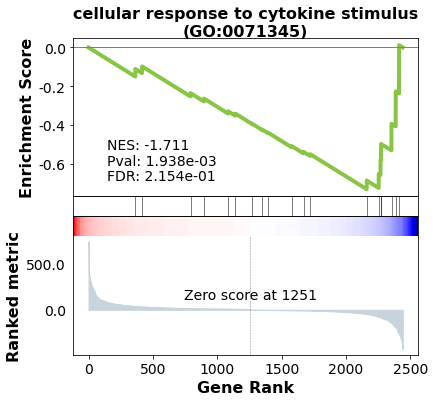

In [15]:
gseapy.gseaplot(rank_metric=pre_res_seaad_astro.ranking, term=terms_seaad_astro[0], **pre_res_seaad_astro.results[terms_seaad_astro[0]])

In [16]:
non_zero_min_brenner_astro = np.min(diff_brenner_astro.p_val_adj[np.nonzero(list(diff_brenner_astro.p_val_adj))[0]])/2
diff_brenner_astro=diff_brenner_astro.replace(0,non_zero_min_brenner_astro)
diff_brenner_astro['Rank'] = -np.log10(diff_brenner_astro.p_val_adj)*diff_brenner_astro.avg_log2FC
diff_brenner_astro = diff_brenner_astro.sort_values('Rank', ascending = False)
ranking_brenner_astro = pd.DataFrame(columns=['Gene','Rank'])
ranking_brenner_astro.Rank = diff_brenner_astro.Rank
ranking_brenner_astro.Gene = diff_brenner_astro.index
ranking_brenner_astro = ranking_brenner_astro.reset_index(drop=True)
pre_res_brenner_astro = gseapy.prerank(rnk=ranking_brenner_astro,
                    gene_sets = 'GO_Biological_Process_2021')
terms_brenner_astro = pre_res_brenner_astro.res2d.Term
terms_brenner_astro[:10]

0    positive regulation of cell differentiation (G...
1    negative regulation of transcription by RNA po...
2          chemical synaptic transmission (GO:0007268)
3       supramolecular fiber organization (GO:0097435)
4              nervous system development (GO:0007399)
5    negative regulation of transcription, DNA-temp...
6                           axon guidance (GO:0007411)
7    negative regulation of cellular process (GO:00...
8                            axonogenesis (GO:0007409)
9    positive regulation of multicellular organisma...
Name: Term, dtype: object

In [17]:
pre_res_brenner_astro.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,positive regulation of cell differentiation (G...,-0.714806,-1.508269,0.030303,0.860104,0.353,7/15,19.02%,MMD2;GPC1;PTN;GPRC5B;CTNNA2;PRKD1;BRINP2
1,prerank,negative regulation of transcription by RNA po...,-0.609337,-1.388302,0.074242,1.0,0.7,5/24,16.13%,TENM2;PRDM16;CPEB3;FGFR2;ZHX2
2,prerank,chemical synaptic transmission (GO:0007268),-0.644115,-1.375523,0.124242,0.919227,0.734,5/15,6.11%,GRM3;CACNB2;GRIN2C;NRXN1;RIMS1
3,prerank,supramolecular fiber organization (GO:0097435),-0.668248,-1.370314,0.104167,0.713351,0.745,3/15,5.60%,COL5A3;COL16A1;MFGE8
4,prerank,nervous system development (GO:0007399),-0.582004,-1.33937,0.109955,0.690617,0.808,10/28,15.11%,NCAN;NRXN1;EPHB1;APC2;ADGRB1;PTN;CSPG5;BCAN;GP...
5,prerank,"negative regulation of transcription, DNA-temp...",-0.561433,-1.332701,0.106825,0.598976,0.817,5/31,16.13%,TENM2;PRDM16;CPEB3;FGFR2;ZHX2
6,prerank,axon guidance (GO:0007411),-0.622882,-1.313335,0.137771,0.57233,0.855,5/16,9.51%,NRXN1;PLXNB1;EPHB1;DOK5;GPC1
7,prerank,negative regulation of cellular process (GO:00...,0.537833,1.304762,0.190769,0.377344,0.713,2/20,3.90%,TXNIP;FTH1
8,prerank,axonogenesis (GO:0007409),-0.572574,-1.249176,0.209553,0.706137,0.93,6/19,11.54%,NRXN1;EPHB1;DOK5;ADGRB1;GPC1;FGFR2
9,prerank,positive regulation of multicellular organisma...,-0.594999,-1.241462,0.224165,0.651295,0.933,5/15,12.05%,SLC27A1;PRDM16;PTN;CADM1;LRP1


[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

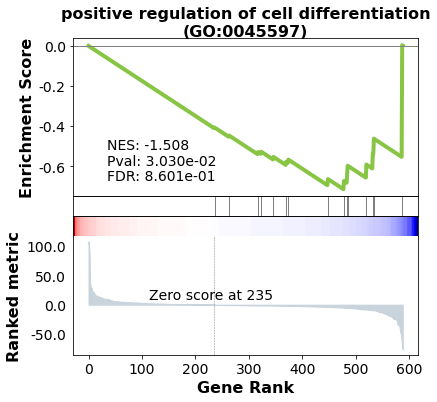

In [18]:
gseapy.gseaplot(rank_metric=pre_res_brenner_astro.ranking, term=terms_brenner_astro[0], **pre_res_brenner_astro.results[terms_brenner_astro[0]])

In [19]:
set(pre_res_seaad_astro.res2d.Term).intersection(pre_res_brenner_astro.res2d.Term)

{'cellular protein modification process (GO:0006464)',
 'negative regulation of cellular macromolecule biosynthetic process (GO:2000113)',
 'negative regulation of cellular process (GO:0048523)',
 'negative regulation of transcription by RNA polymerase II (GO:0000122)',
 'negative regulation of transcription, DNA-templated (GO:0045892)',
 'nervous system development (GO:0007399)',
 'positive regulation of cellular process (GO:0048522)',
 'positive regulation of gene expression (GO:0010628)',
 'positive regulation of intracellular signal transduction (GO:1902533)',
 'positive regulation of multicellular organismal process (GO:0051240)',
 'positive regulation of protein phosphorylation (GO:0001934)',
 'positive regulation of transcription by RNA polymerase II (GO:0045944)',
 'positive regulation of transcription, DNA-templated (GO:0045893)',
 'protein phosphorylation (GO:0006468)',
 'regulation of apoptotic process (GO:0042981)',
 'regulation of cell migration (GO:0030334)',
 'regulation

In [20]:
np.where(pre_res_seaad_astro.res2d.Term=='cellular protein modification process (GO:0006464)')[0]

array([33])

In [21]:
pre_res_seaad_astro.res2d.iloc[33,:]

Name                                                    prerank
Term          cellular protein modification process (GO:0006...
ES                                                    -0.361921
NES                                                   -1.060236
NOM p-val                                              0.376218
FDR q-val                                              0.929866
FWER p-val                                                  1.0
Tag %                                                      8/62
Gene %                                                    8.68%
Lead_genes       ISG15;ANXA1;CPE;PSMB4;UFL1;MAPK10;PTPN13;NEK10
Name: 33, dtype: object

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

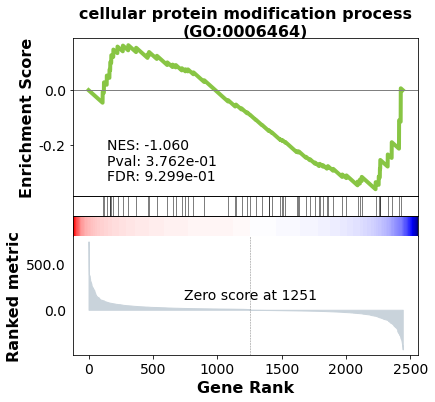

In [22]:
gseapy.gseaplot(rank_metric=pre_res_seaad_astro.ranking, term=terms_seaad_astro[33], **pre_res_seaad_astro.results[terms_seaad_astro[33]])

In [23]:
np.where(pre_res_brenner_astro.res2d.Term=='cellular protein modification process (GO:0006464)')[0]

array([24])

In [24]:
pre_res_brenner_astro.res2d.iloc[24,:]

Name                                                    prerank
Term          cellular protein modification process (GO:0006...
ES                                                    -0.411368
NES                                                   -0.963005
NOM p-val                                              0.525773
FDR q-val                                              0.674961
FWER p-val                                                0.996
Tag %                                                     10/30
Gene %                                                   23.26%
Lead_genes    MFGE8;MACROD2;LYN;BCR;PRKD1;GPS1;HS3ST5;PTPRG;...
Name: 24, dtype: object

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

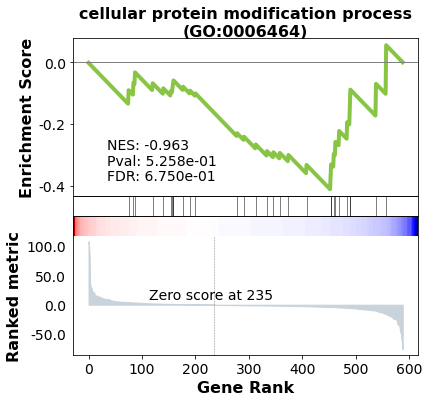

In [25]:
gseapy.gseaplot(rank_metric=pre_res_brenner_astro.ranking, term=terms_brenner_astro[24], **pre_res_brenner_astro.results[terms_brenner_astro[24]])